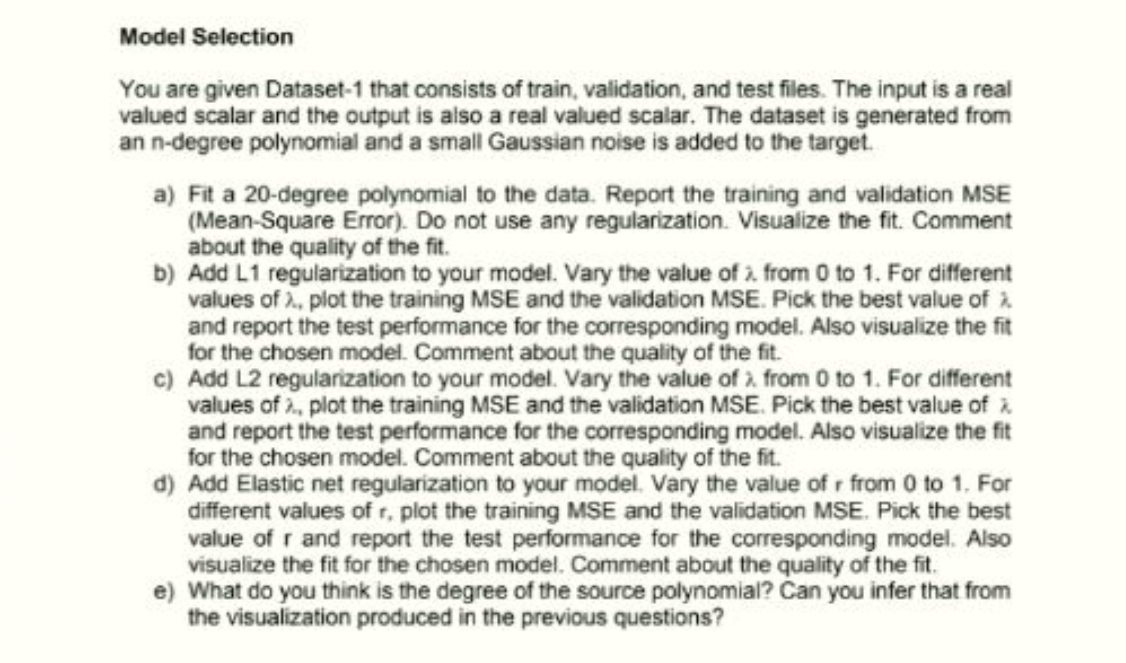

#*Initial Code*

In [1]:
# setting up the path for dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd "drive"

/content/drive


In [3]:
ls

MyDrive/


In [4]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [5]:
# Read the datasets
df_train = pd.read_csv("/content/drive/MyDrive/Dataset_1_train_canada.csv")

# *Question 1 - Fitting model and finding Mean Square Error*

**Train dataset**

In [6]:
# observe the train dataframe
df_train.head()

,0.516219704459,1.60967137364,Unnamed: 2
0,0.850085,14.814006,NaN
1,-0.840629,-8.738649,NaN
2,0.227433,-0.274344,NaN
3,-0.649508,-8.683412,NaN
4,0.621241,5.992031,NaN


In [7]:
df_train = df_train.rename(columns = {"0.516219704459":"input", "1.60967137364":"output"})

In [8]:
df_train.head()

,input,output,Unnamed: 2
0,0.850085,14.814006,NaN
1,-0.840629,-8.738649,NaN
2,0.227433,-0.274344,NaN
3,-0.649508,-8.683412,NaN
4,0.621241,5.992031,NaN


In [9]:
# know the shape of df_train dataset
df_train.shape

(49, 3)

In [10]:
# column names of dataset
df_train.columns

Index(['input', 'output', 'Unnamed: 2'], dtype='object')

In [11]:
# drop the unnecessary third column
df_train = df_train[['input','output']]

In [12]:
df_train = df_train.sort_values(by='input')

In [13]:
# check the modified dataset.
df_train.head()


,input,output
48,-0.996609,-3.634394
20,-0.941586,-5.081398
25,-0.859347,-8.850104
1,-0.840629,-8.738649
16,-0.703750,-7.793225


In [14]:
# split into input (features) and output (labels)
y_train = df_train['output']
X_train = df_train.drop(columns = ['output'])
X_train = X_train.sort_values(by='input')

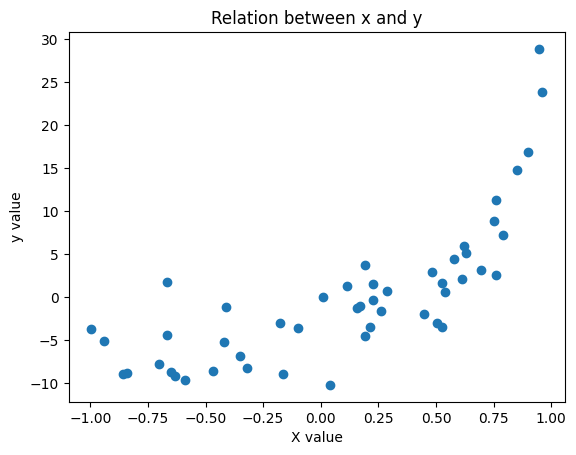

In [15]:
# plot and observe the variations between x and y
plt.xlabel("X value")
plt.ylabel("y value")
plt.title("Relation between x and y")
plt.scatter(X_train,y_train)
plt.show()

In [16]:
print(X_train.head())

       input
48 -0.996609
20 -0.941586
25 -0.859347
1  -0.840629
16 -0.703750


In [17]:
y_train[:5]

48   -3.634394
20   -5.081398
25   -8.850104
1    -8.738649
16   -7.793225
Name: output, dtype: float64

In [18]:
# create an instance of polynomial features and transform single degree to higher degree dataset
given_degree = 20
polynomial = PolynomialFeatures(degree = given_degree)
X_train_poly = polynomial.fit_transform(X_train)

In [19]:
# create an instance of model
model = LinearRegression()

In [20]:
model.fit(X_train_poly, y_train)

LinearRegression()

In [21]:
# predict the model output
y_train_predict = model.predict(X_train_poly)

In [22]:
mse_train = mean_squared_error(y_train_predict,y_train)

In [23]:
#print the mean squared error of training dataset
print(mse_train)

6.556230338048568


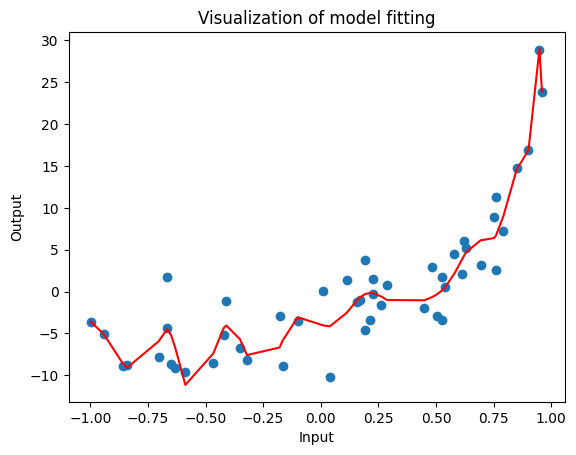

In [24]:
# visualize the model fitting
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Visualization of model fitting")
plt.plot(X_train,y_train_predict,color='red')
plt.scatter(X_train,y_train)
plt.show()

**Test Dataset**

In [25]:
# Read the test dataset
df_test = pd.read_csv("/content/drive/MyDrive/Dataset_1_test_canada.csv")

In [26]:
# print the test dataset
df_test.head()

,-0.33525411615,-2.95340122406,Unnamed: 2
0,0.122457,-5.836786,NaN
1,-0.819361,-9.321124,NaN
2,-0.860443,-3.800950,NaN
3,0.422628,2.100318,NaN
4,-0.007729,-3.405798,NaN


In [27]:
# Modify the dataset like removing unnecessary columns
df_test = df_test.rename(columns= {"-0.33525411615":"input","-2.95340122406":"output"})
df_test = df_test.drop(columns = ['Unnamed: 2'])

In [28]:
# sort the dataset by input values for better plotting
df_test = df_test.sort_values(by='input')

In [29]:
# divide the dataset into input and output
y_test = df_test['output']
X_test = df_test.drop(columns=['output'])

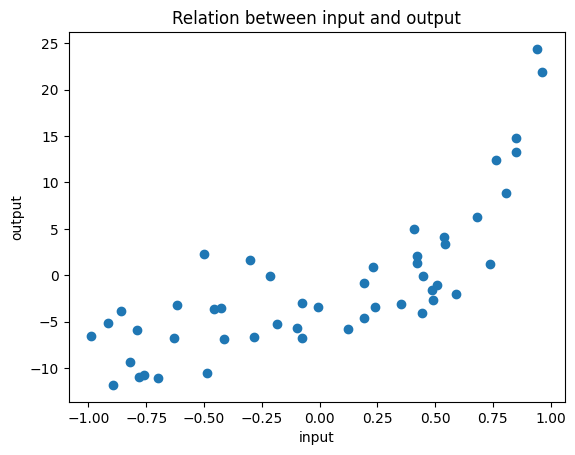

In [30]:
# plot and observe the relation between input and output
plt.xlabel("input")
plt.ylabel("output")
plt.title("Relation between input and output")
plt.scatter(X_test,y_test)
plt.show()

In [31]:
# print the y output values
y_test[:5]

30    -6.497606
22    -5.110324
31   -11.813734
2     -3.800950
1     -9.321124
Name: output, dtype: float64

In [32]:
# print the input values
X_test.head()

,input
30,-0.988770
22,-0.913618
31,-0.895417
2,-0.860443
1,-0.819361


In [33]:
# Use the same polynomial model and get the higher order dataset
X_test_poly = polynomial.fit_transform(X_test)

In [34]:
X_test_poly[:2]

array([[ 1.        , -0.98877038,  0.97766687, -0.96668804,  0.95583251,
        -0.94509887,  0.93448577, -0.92399186,  0.91361578, -0.90335623,
         0.89321188, -0.88318145,  0.87326366, -0.86345725,  0.85376095,
        -0.84417354,  0.8346938 , -0.8253205 ,  0.81605247, -0.80688851,
         0.79782746],
       [ 1.        , -0.91361822,  0.83469825, -0.76259553,  0.69672117,
        -0.63653715,  0.58155194, -0.53131645,  0.48542039, -0.44348891,
         0.40517955, -0.37017942,  0.33820266, -0.30898811,  0.28229717,
        -0.25791183,  0.23563295, -0.21527856,  0.19668241, -0.17969263,
         0.16417046]])

In [35]:
# get the predictions of test dataset from the previous trained model
y_test_predict = model.predict(X_test_poly)

In [36]:
# print the MSE of test dataset
mse_test = mean_squared_error(y_test_predict, y_test)

In [37]:
mse_test

50.952283590206136

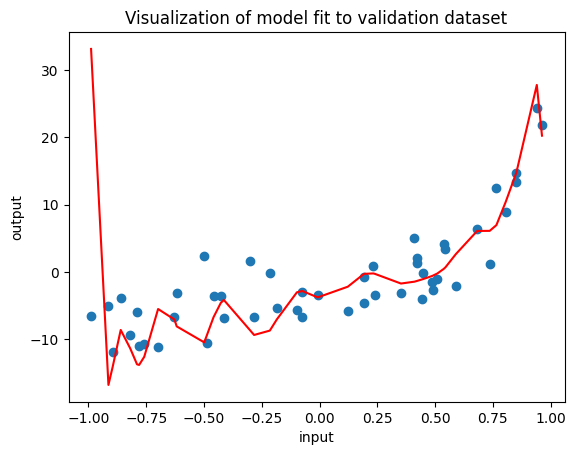

In [38]:
# observe the plot of fitting curve
plt.xlabel("input")
plt.ylabel("output")
plt.title("Visualization of model fit to validation dataset")
plt.plot(X_test, y_test_predict,color='red')
plt.scatter(X_test, y_test)
plt.show()

**Validation Dataset**

In [39]:
# read the validation dataset
df_valid = pd.read_csv("/content/drive/MyDrive/Dataset_1_valid_canada.csv")

In [40]:
# print the dataset
df_valid.head()

,0.194240864819,1.93129082282,Unnamed: 2
0,0.878633,17.545736,NaN
1,-0.276443,-1.173417,NaN
2,0.996344,32.234868,NaN
3,0.648838,8.063874,NaN
4,-0.417379,-10.291039,NaN


In [41]:
# modify the dataset
df_valid = df_valid.rename(columns= {"0.194240864819":"input","1.93129082282":"output"})
df_valid = df_valid.drop(columns = ['Unnamed: 2'])

In [42]:
# sort the dataset for better plotting
df_valid = df_valid.sort_values(by='input')

In [43]:
y_valid = df_valid['output']
X_valid = df_valid.drop(columns = ['output'])

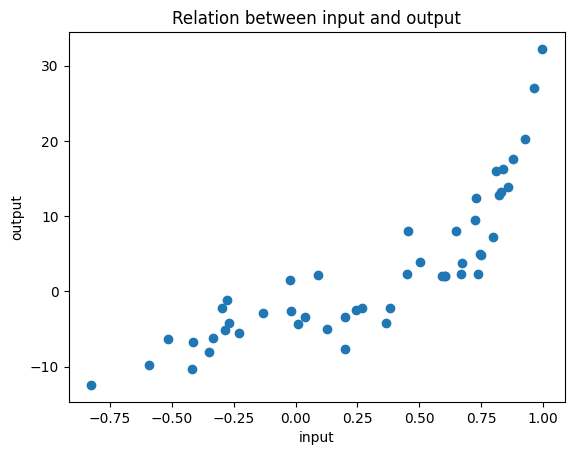

In [44]:
plt.xlabel("input")
plt.ylabel("output")
plt.title("Relation between input and output")
plt.scatter(X_valid, y_valid)
plt.show()

In [45]:
df_valid.head()

,input,output
7,-0.826734,-12.434995
46,-0.593553,-9.815751
34,-0.513811,-6.298612
4,-0.417379,-10.291039
31,-0.412672,-6.713309


In [46]:
y_valid[:5]

7    -12.434995
46    -9.815751
34    -6.298612
4    -10.291039
31    -6.713309
Name: output, dtype: float64

In [47]:
X_valid_poly = polynomial.fit_transform(X_valid)

In [48]:
y_valid_predict = model.predict(X_valid_poly)

In [49]:
# print the MSE
mse_valid = mean_squared_error(y_valid, y_valid_predict)
mse_valid

1486.703422253258

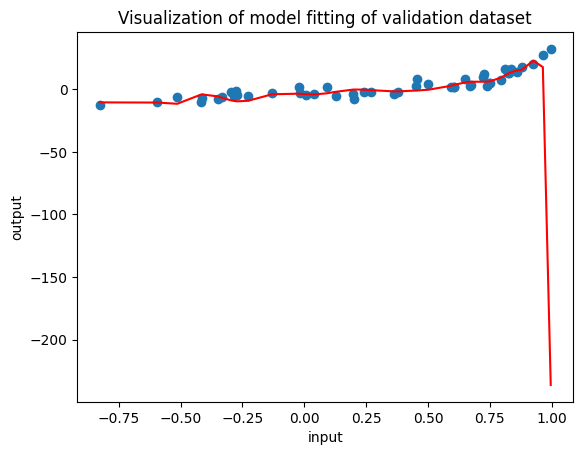

In [50]:
# observe the fit model of validation dataset
plt.xlabel("input")
plt.ylabel("output")
plt.title("Visualization of model fitting of validation dataset")
plt.scatter(X_valid, y_valid)
plt.plot(X_valid,y_valid_predict,color = 'red')
plt.show()

In [51]:
MSE_train = mean_squared_error(y_train_predict, y_train)
MSE_valid = mean_squared_error(y_valid_predict, y_valid)
MSE_test = mean_squared_error(y_test_predict,y_test)

#*Question 2 - L1 Regularization*

L1 Regularization :

Adding the penalty terms to the sum of weights so that importance of higher degree features decreases.

When the model is overfitting, Regularization is preferred.

L1 regularization --> Adding abosolute values of weights as a penalty term

In [52]:
# Training MSE and validation MSE should be found for different values of lambda and then best lambda should be selected

In [53]:
#import the required libraries
from sklearn.linear_model import Lasso

In [54]:
# create a list of lambdas for observation
MSEs_train_L1 = {}
MSEs_valid_L1 = {}
lambdas = np.linspace(0,1,10)
lambdas[:5]

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444])

In [55]:
# take sample lambda value and observe the MSE
lam = 0.5
model_L1 = Lasso(alpha = lam)
model_L1.fit(X_train_poly, y_train)
y_valid_predict_L1 = model_L1.predict(X_valid_poly)
MSE_valid_L1 = mean_squared_error(y_valid, y_valid_predict_L1)
print(f"MSE of L1 regularization is : {MSE_valid_L1}")
print(f"MSE without regularization is : {mse_valid}")

MSE of L1 regularization is : 21.154904758364793
MSE without regularization is : 1486.703422253258


In [56]:
# find the MSE for each lambda
for lam in lambdas:
  # create as instance of Lasso model
  model_L1 = Lasso(alpha = lam)

  # train the model with training dataset
  model_L1.fit(X_train_poly, y_train)

  # get the predictions
  y_train_predict = model_L1.predict(X_train_poly)
  y_valid_predict = model_L1.predict(X_valid_poly)

  #Get the mean squared errors
  MSE_train = mean_squared_error(y_train, y_train_predict)
  MSE_valid = mean_squared_error(y_valid,y_valid_predict)

  # append the errors into the list
  MSEs_train_L1[lam] = MSE_train
  MSEs_valid_L1[lam] = MSE_valid

best_lambda = min(MSEs_valid_L1, key = MSEs_valid_L1.get)
print(best_lambda)


0.0


<ipython-input-56-bcbcbd846456>:7: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_L1.fit(X_train_poly, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+02, tolerance: 3.316e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [57]:
# Best model :
best_model_L1 = Lasso(alpha = best_lambda)
best_model_L1.fit(X_train_poly, y_train)
y_train_predict_L1 = best_model_L1.predict(X_train_poly)
y_valid_predict_L1 = best_model_L1.predict(X_valid_poly)
y_test_predict_L1 = best_model_L1.predict(X_test_poly)
MSE_train_L1 = mean_squared_error(y_train_predict_L1, y_train)
MSE_valid_L1 = mean_squared_error(y_valid_predict_L1, y_valid)
MSE_test_L1 = mean_squared_error(y_test_predict_L1,y_test)

<ipython-input-57-b832f2932ad7>:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  best_model_L1.fit(X_train_poly, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.168e+02, tolerance: 3.316e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


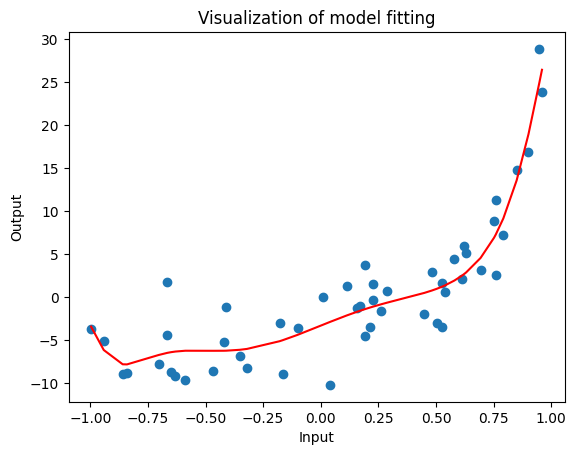

In [58]:
# visualize the model fitting
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Visualization of model fitting")
plt.plot(X_train,y_train_predict_L1,color='red')
plt.scatter(X_train,y_train)
plt.show()

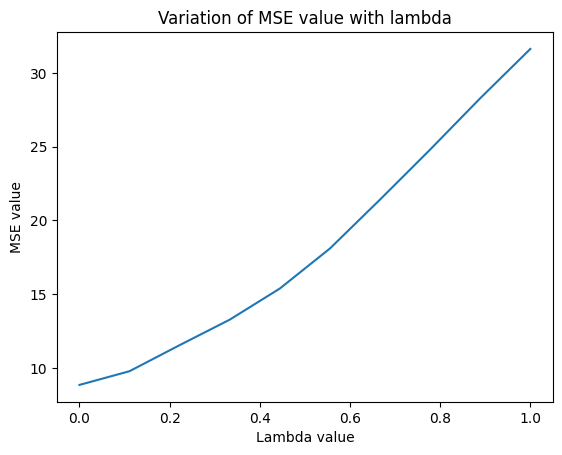

In [59]:
# plot the lambda vs MSE plot for training dataset
plt.xlabel("Lambda value")
plt.ylabel("MSE value")
plt.title("Variation of MSE value with lambda")
plt.plot(MSEs_train_L1.keys(), MSEs_train_L1.values())
plt.show()

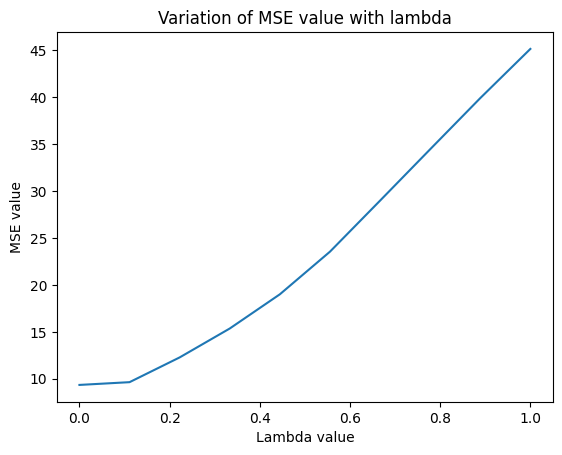

In [60]:
# plot the lambda vs MSE plot for validation dataset
plt.xlabel("Lambda value")
plt.ylabel("MSE value")
plt.title("Variation of MSE value with lambda")
plt.plot(lambdas, MSEs_valid_L1.values())
plt.show()

From the observed graphs, we can say that lambda=0 is giving the least error and the model do not require any regularization

#*Question 3 - L2 Regularization*

Similar to L1 regularization but the penalty term is sum of squares of weights of model

In [61]:
#import the required libraries
from sklearn.linear_model import Ridge

In [62]:
# create a list of lambdas for observation
MSEs_train_L2 = {}
MSEs_valid_L2 = {}
lambdas = np.linspace(0,1,10)
lambdas[:5]

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444])

In [63]:
# take sample lambda value and observe the MSE
lam = 0.5
model_L2 = Lasso(alpha = lam)
model_L2.fit(X_train_poly, y_train)
y_valid_predict_L2 = model_L2.predict(X_valid_poly)
MSE_valid_L2 = mean_squared_error(y_valid, y_valid_predict_L2)
print(f"MSE of L2 regularization is : {MSE_valid_L2}")
print(f"MSE without regularization is : {mse_valid}")

MSE of L2 regularization is : 21.154904758364793
MSE without regularization is : 1486.703422253258


In [64]:
# find the MSE for each lambda
for lam in lambdas:
  # create as instance of Lasso model
  model_L2 = Ridge(alpha = lam)

  # train the model with training dataset
  model_L2.fit(X_train_poly, y_train)

  # get the predictions
  y_train_predict = model_L2.predict(X_train_poly)
  y_valid_predict = model_L2.predict(X_valid_poly)

  #Get the mean squared errors
  MSE_train = mean_squared_error(y_train, y_train_predict)
  MSE_valid = mean_squared_error(y_valid,y_valid_predict)

  # append the errors into the list
  MSEs_train_L2[lam] = MSE_train
  MSEs_valid_L2[lam] = MSE_valid

best_lambda = min(MSEs_valid_L2, key = MSEs_valid_L2.get)
print("Best value of lambda for L2 Regularization is : ",best_lambda)


Best value of lambda for L2 Regularization is :  0.1111111111111111


In [65]:
# Best model :
best_model_L2 = Ridge(alpha = best_lambda)
best_model_L2.fit(X_train_poly, y_train)
y_train_predict_L2 = best_model_L2.predict(X_train_poly)
y_valid_predict_L2 = best_model_L2.predict(X_valid_poly)
y_test_predict_L2 = best_model_L2.predict(X_test_poly)
MSE_train_L2 = mean_squared_error(y_train_predict_L2, y_train)
MSE_valid_L2 = mean_squared_error(y_valid_predict_L2, y_valid)
MSE_test_L2 = mean_squared_error(y_test_predict_L2,y_test)

In [66]:
# Finding the MSE with best lambda
model_L2 = Ridge(alpha = best_lambda)
model_L2.fit(X_valid_poly, y_valid)
y_valid_predict_bestfit = model_L2.predict(X_valid_poly)
mse_valid_L2_bestfit = mean_squared_error(y_valid_predict_bestfit, y_valid)
print("MSE best fit with validation dataset is : ", mse_valid_L2_bestfit)
print("MSE with validation dataset without regularization : ", mse_valid)

MSE best fit with validation dataset is :  7.753317118601309
MSE with validation dataset without regularization :  1486.703422253258


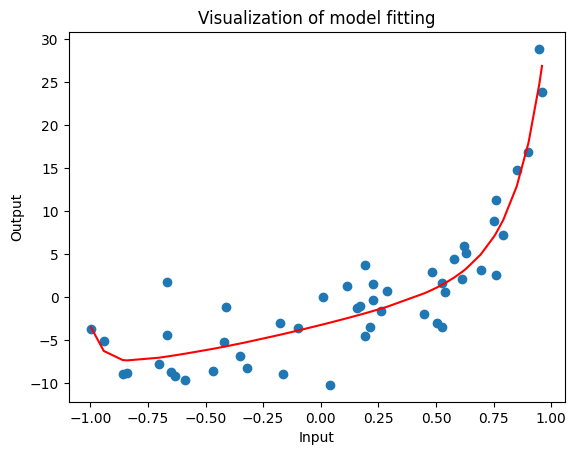

In [67]:
# visualize the model fitting
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Visualization of model fitting")
plt.plot(X_train,y_train_predict_L2,color='red')
plt.scatter(X_train,y_train)
plt.show()

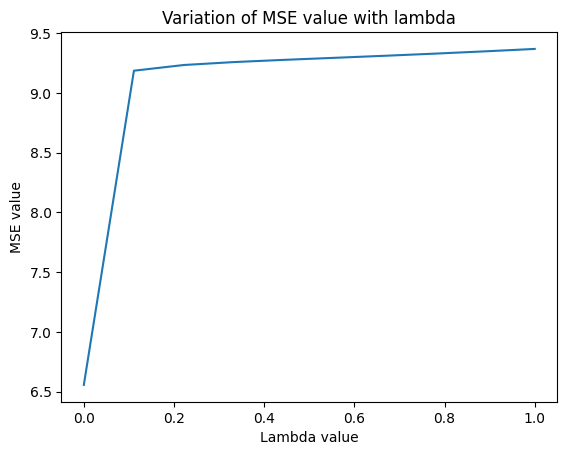

In [68]:
# plot the lambda vs MSE plot for training dataset
plt.xlabel("Lambda value")
plt.ylabel("MSE value")
plt.title("Variation of MSE value with lambda")
plt.plot(lambdas, MSEs_train_L2.values())
plt.show()

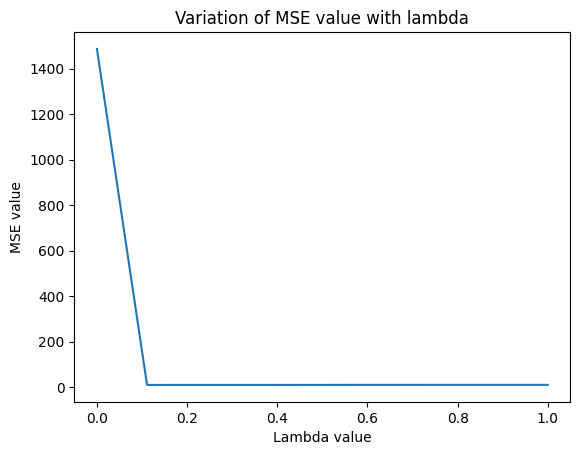

In [69]:
# plot the lambda vs MSE plot for validation dataset
plt.xlabel("Lambda value")
plt.ylabel("MSE value")
plt.title("Variation of MSE value with lambda")
plt.plot(lambdas, MSEs_valid_L2.values())
plt.show()

From the observed graphs, we can say that lambda=0.526 is giving the least error and the model do not require any regularization

#*Question 4 - Elastic Net Regularization*

Elastic Net Regularization: -> Combination of L1 and L2 regularizations - used in case of highly correlated features

Elastic Net Penalty = α * (L1 Penalty) + β * (L2 Penalty)

L1 penalty = sum of absolute values of weights
L2 penalty = sum of squared of values weights

In [70]:
# import the required libraries
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [71]:
# create a list of lambdas for observation
MSEs_train_elasticnet = {}
MSEs_valid_elasticnet = {}
r_values = np.linspace(0,1,10)
r_values[:5]

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444])

In [72]:
# take sample r value and observe the MSE
r = 0.5
model_elasticnet = ElasticNet(l1_ratio = r)
model_elasticnet.fit(X_train_poly, y_train)
y_valid_predict_elasticnet = model_elasticnet.predict(X_valid_poly)
MSE_valid_elasticnet = mean_squared_error(y_valid, y_valid_predict_elasticnet)
print(f"MSE of Elastic Net regularization is : {MSE_valid_elasticnet}")
print(f"MSE without regularization is : {mse_valid}")

MSE of Elastic Net regularization is : 50.7345130174609
MSE without regularization is : 1486.703422253258


In [73]:
# using GridSearchCV ( grid search cross validation ) library instead of manually finding out error for each hyperparameter
# Define an elastic model
model_elasticnet = ElasticNet()

# define the parameters grid
param_grid = {'l1_ratio':r_values}

# define GridSearch Instance
grid_search = GridSearchCV(model_elasticnet, param_grid, cv = 3, scoring = "neg_mean_squared_error")

# Train the grid search model
grid_search.fit(X_train_poly, y_train)

# get the best value of ratio hyperparameter
best_l1_ratio = grid_search.best_params_['l1_ratio']

# Now fit the model with best hyperparameter
model_best_fit = ElasticNet(l1_ratio = best_l1_ratio)

# Train the model
model_best_fit.fit(X_train_poly, y_train)

# get the predictions from best fit model
y_valid_predict_best_elastic_model = model_best_fit.predict(X_valid_poly)

# Finding out the MSE with best fit model
MSE_valid_best_elastic_model = mean_squared_error(y_valid_predict_best_elastic_model, y_valid)

# printing the errors for comparision
print(f"MSE of best Elastic Net regularization is : {MSE_valid_best_elastic_model}")
print(f"MSE valid without regularization is : {mse_valid}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.096e+02, tolerance: 2.077e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.271e+02, tolerance: 3.099e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

MSE of best Elastic Net regularization is : 47.799052854973674
MSE valid without regularization is : 1486.703422253258


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+03, tolerance: 3.316e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+03, tolerance: 3.316e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

In [74]:
best_l1_ratio

0.0

In [75]:
# Best model :
best_model_en = ElasticNet(l1_ratio = best_l1_ratio)
best_model_en.fit(X_train_poly, y_train)
y_train_predict_en = best_model_en.predict(X_train_poly)
y_valid_predict_en = best_model_en.predict(X_valid_poly)
y_test_predict_en = best_model_en.predict(X_test_poly)
MSE_train_en = mean_squared_error(y_train_predict_en, y_train)
MSE_valid_en = mean_squared_error(y_valid_predict_en, y_valid)
MSE_test_en = mean_squared_error(y_test_predict_en,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.148e+03, tolerance: 3.316e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


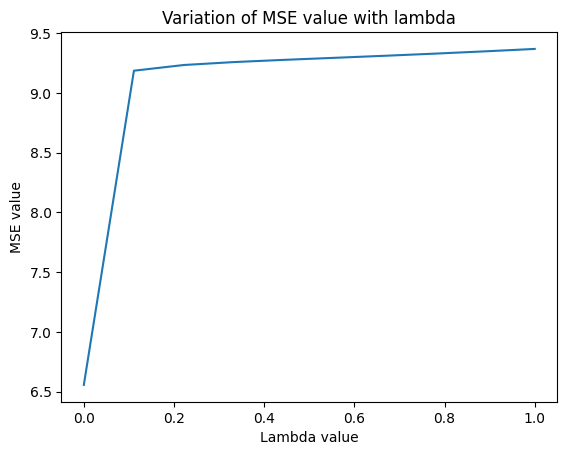

In [76]:
# plot the lambda vs MSE plot for training dataset
plt.xlabel("Lambda value")
plt.ylabel("MSE value")
plt.title("Variation of MSE value with lambda")
plt.plot(lambdas, MSEs_train_L2.values())
plt.show()

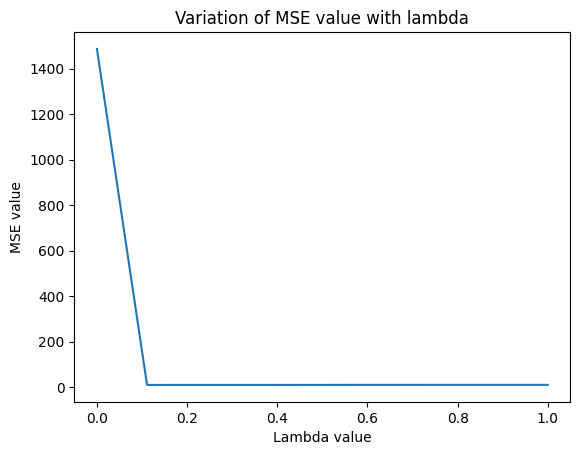

In [77]:
# plot the lambda vs MSE plot for validation dataset
plt.xlabel("Lambda value")
plt.ylabel("MSE value")
plt.title("Variation of MSE value with lambda")
plt.plot(lambdas, MSEs_valid_L2.values())
plt.show()

From the observed graphs, we can say that lambda=0.526 is giving the least error and the model do not require any regularization

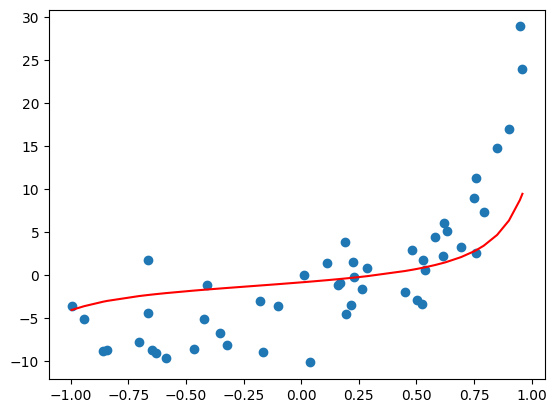

In [78]:
# observing the fitting of elasticnet curve
y_train_predict_best_elastic_model = model_best_fit.predict(X_train_poly)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_predict_best_elastic_model, color = 'red')

#*Observing plots of different Regularization*

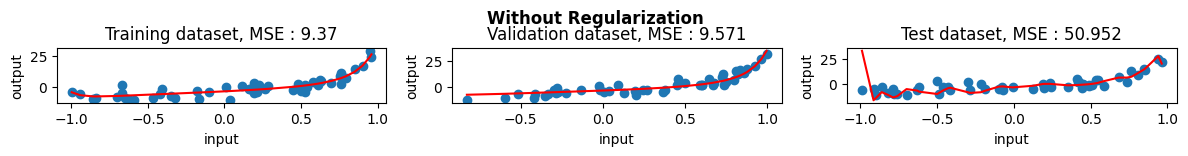

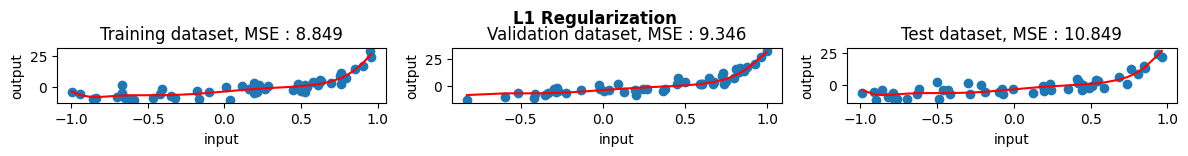

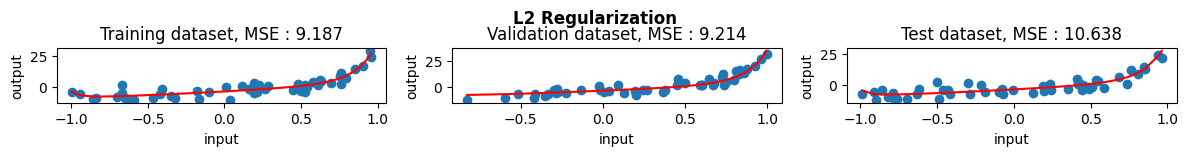

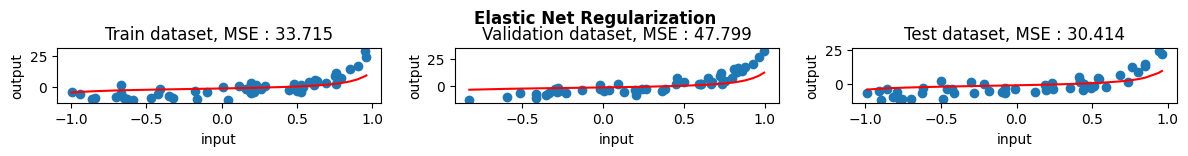

In [79]:

# without regularization
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(12,1.5))
# plt.subplots_adjust(top = 0.8, bottom = 0.7)

fig.text(0.5, 0.95, 'Without Regularization', ha='center', va='center', fontsize=12, fontweight='bold')

axes[0].set_xlabel("input")
axes[0].set_ylabel("output")
axes[0].set_title(f"Training dataset, MSE : {np.round(MSE_train,3)}")
axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, y_train_predict, color = 'red')

axes[1].set_xlabel("input")
axes[1].set_ylabel("output")
axes[1].set_title(f"Validation dataset, MSE : {np.round(MSE_valid,3)}")
axes[1].scatter(X_valid, y_valid)
axes[1].plot(X_valid, y_valid_predict, color = 'red')

axes[2].set_xlabel("input")
axes[2].set_ylabel("output")
axes[2].set_title(f"Test dataset, MSE : {np.round(MSE_test,3)}")
axes[2].scatter(X_test, y_test)
axes[2].plot(X_test, y_test_predict, color = 'red')
plt.tight_layout()
plt.show()
# With L1 regularization


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(12,1.5))
fig.text(0.5, 0.95, 'L1 Regularization', ha='center', va='center', fontsize=12, fontweight='bold')

axes[0].set_xlabel("input")
axes[0].set_ylabel("output")
axes[0].set_title(f"Training dataset, MSE : {np.round(MSE_train_L1,3)}")
axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, y_train_predict_L1, color = 'red')

axes[1].set_xlabel("input")
axes[1].set_ylabel("output")
axes[1].set_title(f"Validation dataset, MSE : {np.round(MSE_valid_L1,3)}")
axes[1].scatter(X_valid, y_valid)
axes[1].plot(X_valid, y_valid_predict_L1, color = 'red')

axes[2].set_xlabel("input")
axes[2].set_ylabel("output")
axes[2].set_title(f"Test dataset, MSE : {np.round(MSE_test_L1,3)}")
axes[2].scatter(X_test, y_test)
axes[2].plot(X_test, y_test_predict_L1, color = 'red')
plt.tight_layout()
plt.show()
# with L2 regularization


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(12,1.5))
fig.text(0.5, 0.95, 'L2 Regularization', ha='center', va='center', fontsize=12, fontweight='bold')

axes[0].set_xlabel("input")
axes[0].set_ylabel("output")
axes[0].set_title(f"Training dataset, MSE : {np.round(MSE_train_L2,3)}")
axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, y_train_predict_L2, color = 'red')

axes[1].set_xlabel("input")
axes[1].set_ylabel("output")
axes[1].set_title(f"Validation dataset, MSE : {np.round(MSE_valid_L2,3)}")
axes[1].scatter(X_valid, y_valid)
axes[1].plot(X_valid, y_valid_predict_L2, color = 'red')

axes[2].set_xlabel("input")
axes[2].set_ylabel("output")
axes[2].set_title(f"Test dataset, MSE : {np.round(MSE_test_L2,3)}")
axes[2].scatter(X_test, y_test)
axes[2].plot(X_test, y_test_predict_L2, color = 'red')
plt.tight_layout()
plt.show()
# with Elastic net regularization


fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize=(12,1.5))
fig.text(0.5, 0.95, 'Elastic Net Regularization', ha='center', va='center', fontsize=12, fontweight='bold')
axes[0].set_xlabel("input")
axes[0].set_ylabel("output")
axes[0].set_title(f"Train dataset, MSE : {np.round(MSE_train_en,3)}")
axes[0].scatter(X_train, y_train)
axes[0].plot(X_train, y_train_predict_en, color = 'red')

axes[1].set_xlabel("input")
axes[1].set_ylabel("output")
axes[1].set_title(f"Validation dataset, MSE : {np.round(MSE_valid_en,3)}")
axes[1].scatter(X_valid, y_valid)
axes[1].plot(X_valid, y_valid_predict_en, color = 'red')

axes[2].set_xlabel("input")
axes[2].set_ylabel("output")
axes[2].set_title(f"Test dataset, MSE : {np.round(MSE_test_en,3)}")
axes[2].scatter(X_test, y_test)
axes[2].plot(X_test, y_test_predict_en, color = 'red')
plt.tight_layout()
plt.show()

#*Question 5 - Degree source polynomial*

Observation of plots indicates that the dataset test and validation are being fit almost perfectly with little bit more overlapping hence we can say 13-16 may be the order of source polynomial